<a href="https://colab.research.google.com/github/koshal123/M.Tech-Project/blob/master/MTP_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Tensorflow framework

In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from sklearn.model_selection import train_test_split

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using TensorFlow backend.


Using Keras version: 2.2.5 backend: tensorflow


In [2]:
if K.backend() == "tensorflow":
    import tensorflow as tf
    device_name = tf.test.gpu_device_name()
    if device_name == '':
        device_name = "None"
    print('Using TensorFlow version:', tf.__version__, ', GPU:', device_name)

Using TensorFlow version: 1.14.0 , GPU: /device:GPU:0


In [0]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving final_WO_categ.csv to final_WO_categ.csv


In [0]:
dataset=pd.read_csv('final_WO_categ.csv',header=0,encoding = 'unicode_escape')

**Y_new = y * 10^5**

In [6]:
dataset.head()

,x3,x4,x5,x6,y,Y_new
0,0.527,125,15,18.9,0.000008,0.79
1,0.527,125,30,18.9,0.000014,1.38
2,0.527,125,45,18.9,0.000016,1.60
3,0.527,125,60,18.9,0.000017,1.71
4,0.527,125,90,18.9,0.000015,1.46


In [0]:
d = dataset

In [0]:
#dependent and independent variables
X=d.iloc[:, 0:4].values
Y=d.iloc[:, 5].values

In [9]:
Y

array([ 0.79  ,  1.38  ,  1.6   ,  1.71  ,  1.46  ,  0.921 ,  1.51  ,
        1.68  ,  1.79  ,  1.46  ,  0.494 ,  0.773 ,  0.938 ,  0.921 ,
        0.806 ,  0.51  ,  0.839 ,  0.954 ,  0.938 ,  0.806 , 19.233 ,
       31.2268, 40.1606, 42.9904, 34.1389, 24.0042, 36.3765, 42.6284,
       42.2171, 33.958 ,  0.469 ,  0.856 ,  1.12  ,  1.15  ,  1.1312,
        0.582 ,  0.986 ,  1.08  ,  1.0504,  1.1312,  0.776 ,  1.41  ,
        1.83  ,  2.04  ,  1.84  ,  0.921 ,  1.65  ,  1.8584,  1.9392,
        1.84  , 18.891 , 36.1014, 48.0598, 54.2168, 50.7747, 25.0803,
       40.9656, 47.4942, 47.8336, 50.5808,  0.0732,  0.176 ,  0.229 ,
        0.1   ,  0.194 ,  0.225 ,  1.1   ,  6.4   , 15.8   , 24.3   ,
       20.3   , 18.9   ,  0.8   ,  5.8   , 13.7   , 19.9   , 19.2   ,
       16.5   ,  0.7   ,  5.3   ,  8.8   , 17.7   , 15.9   , 13.9   ,
        7.    , 19.2   , 46.8   , 63.6   , 56.9   , 49.7   ,  3.4   ,
       17.8   , 42.    , 52.8   , 49.7   , 44.6   ,  1.9   ,  9.8   ,
       20.9   , 31.7

In [16]:
Y.shape

(148,)

In [17]:
X

array([[  0.527, 125.   ,  15.   ,  18.9  ],
       [  0.527, 125.   ,  30.   ,  18.9  ],
       [  0.527, 125.   ,  45.   ,  18.9  ],
       [  0.527, 125.   ,  60.   ,  18.9  ],
       [  0.527, 125.   ,  90.   ,  18.9  ],
       [  0.527, 125.   ,  15.   ,  18.9  ],
       [  0.527, 125.   ,  30.   ,  18.9  ],
       [  0.527, 125.   ,  45.   ,  18.9  ],
       [  0.527, 125.   ,  60.   ,  18.9  ],
       [  0.527, 125.   ,  90.   ,  18.9  ],
       [  0.527, 125.   ,  15.   ,  34.6  ],
       [  0.527, 125.   ,  30.   ,  34.6  ],
       [  0.527, 125.   ,  45.   ,  34.6  ],
       [  0.527, 125.   ,  60.   ,  34.6  ],
       [  0.527, 125.   ,  90.   ,  34.6  ],
       [  0.527, 125.   ,  15.   ,  34.6  ],
       [  0.527, 125.   ,  30.   ,  34.6  ],
       [  0.527, 125.   ,  45.   ,  34.6  ],
       [  0.527, 125.   ,  60.   ,  34.6  ],
       [  0.527, 125.   ,  90.   ,  34.6  ],
       [  0.527, 125.   ,  15.   ,  55.7  ],
       [  0.527, 125.   ,  30.   ,  55.7  ],
       [  

In [0]:
#Cross validation by test and training data set
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test  = train_test_split(X,Y, test_size=0.1, random_state=0)

**We are scaling only the independend variables, it is not important to scale dependent variable too**

In [0]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc  =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
X_train.shape

(133, 4)

In [49]:
Y_train.shape

(133,)

In [50]:
X_test.shape

(15, 4)

In [51]:
Y_test.shape

(15,)

#Start to make artificial neural network

In [0]:
#Initializing the ANN
model=Sequential()

In [0]:
#Adding input layer and first hidden layer
#input neuron=4 , hidden neuron=9
model.add(Dense(16,input_dim=4,activation='relu'))

In [0]:
#second hidden layer
model.add(Dense(14,activation='relu'))

In [0]:
#third hidden layer
 model.add(Dense(12,activation='relu'))

In [0]:
#Adding the output layer
model.add(Dense(1, activation="linear"))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 14)                238       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                180       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile the ANN
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [0]:
#Fitting the ANN in training set
#estimator=model.fit(X_train,Y_train,validation_split=0.1 , batch_size=4, epochs=400, verbose=1 )  #with validation_split
estimator=model.fit(X_train,Y_train , batch_size=5, epochs=450, verbose=0 ) #Without validation_split

#plot of training loss and validation loss

dict_keys(['loss', 'mean_squared_error'])


KeyError: ignored

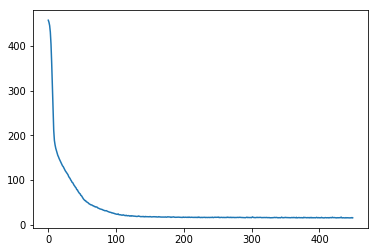

In [60]:
plt.figure(figsize=(6, 4))
print(estimator.history.keys())
# "Loss"
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Using testing data for prediction

In [61]:
y_pred = model.predict(X_test)
print(y_pred)

[[34.619995 ]
 [ 2.0965655]
 [ 3.979768 ]
 [ 1.9344852]
 [43.140343 ]
 [32.65074  ]
 [ 3.162466 ]
 [49.794506 ]
 [ 1.9344852]
 [15.727104 ]
 [18.91744  ]
 [43.140343 ]
 [15.727104 ]
 [18.981504 ]
 [52.984547 ]]


#Experimental Value

In [62]:
print(Y_test)

[34.1389  1.68    1.08    1.07   42.6284 36.3765  2.04   50.7747  4.21
 18.9    19.2    40.1606 13.9    25.42   37.7   ]


In [0]:
#Scatter plot of y_pred vs Y-test
# plt.scatter(y_pred, Y_test)
# plt.show()

#Plot of experimental vs predicted value

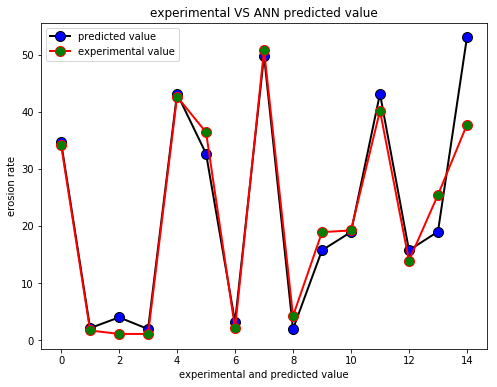

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(y_pred, color='black',linewidth = 2, marker='o', markerfacecolor='blue', markersize=10, label='predicted value')
plt.plot(Y_test, color='red',linewidth = 2, marker='o', markerfacecolor='green', markersize=10, label='experimental value')
plt.xlabel('experimental and predicted value')
plt.ylabel('erosion rate')
plt.title('experimental VS ANN predicted value')
plt.legend()
plt.show()

**Using External to Predict the output**

In [66]:
from google.colab import files
uploaded = files.upload()

Saving Test data.csv to Test data (1).csv


In [0]:
dataset_1=pd.read_csv('Test data.csv',header=0,encoding = 'unicode_escape')

In [68]:
dataset_1

,matrix,fiber,volume fraction,particle size,impact angle,Velocity,erosion,erosion*10^5,predicted_ANN,Unnamed: 9,Unnamed: 10,error
0,Epoxy,Glass fiber,0.6,75.0,30.0,100.0,0.000357,35.714286,20.166053,NaN,NaN,0.435351
1,Epoxy,Glass fiber,0.6,75.0,60.0,100.0,0.000571,57.142857,23.842970,NaN,NaN,0.582748
2,Epoxy,Glass fiber,0.6,75.0,90.0,100.0,0.000357,35.714286,29.607248,NaN,NaN,0.170997
3,Epoxy,Glass fiber,0.6,75.0,60.0,75.0,0.000264,26.428571,23.826118,NaN,NaN,0.098471
4,Epoxy,Glass fiber,0.6,75.0,60.0,50.0,0.000057,5.714286,19.243656,NaN,NaN,NaN
5,Epoxy,Glass fiber,0.6,75.0,60.0,100.0,0.000452,45.238095,23.842970,NaN,NaN,0.472945
6,Epoxy,Glass fiber,0.6,75.0,60.0,100.0,0.000429,42.857143,23.842970,NaN,NaN,0.443664
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average,0.367363
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
Z=dataset_1.iloc[0:7, 2:6].values

In [70]:
Z

array([[  0.6,  75. ,  30. , 100. ],
       [  0.6,  75. ,  60. , 100. ],
       [  0.6,  75. ,  90. , 100. ],
       [  0.6,  75. ,  60. ,  75. ],
       [  0.6,  75. ,  60. ,  50. ],
       [  0.6,  75. ,  60. , 100. ],
       [  0.6,  75. ,  60. , 100. ]])

In [0]:
Z_new = sc.transform(Z)

In [72]:
Z_new=model.predict(Z_new)
Z_new

array([[66.586655 ],
       [70.89264  ],
       [67.27121  ],
       [39.25118  ],
       [ 5.9800735],
       [70.89264  ],
       [70.89264  ]], dtype=float32)

In [73]:
Y_old=dataset_1.iloc[:, 7].values
Y_old

array([35.71428571, 57.14285714, 35.71428571, 26.42857143,  5.71428571,
       45.23809524, 42.85714286,         nan,         nan,         nan,
               nan])

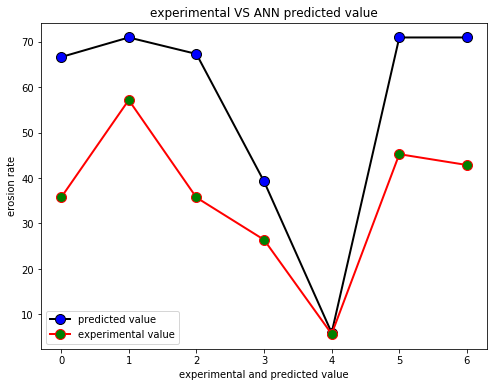

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(Z_new, color='black',linewidth = 2, marker='o', markerfacecolor='blue', markersize=10, label='predicted value')
plt.plot(Y_old, color='red',linewidth = 2, marker='o', markerfacecolor='green', markersize=10, label='experimental value')
plt.xlabel('experimental and predicted value')
plt.ylabel('erosion rate')
plt.title('experimental VS ANN predicted value')
plt.legend()
plt.show()